# Credit Card Data

In [1]:
import pandas as pd
import seaborn
import numpy as np
from pandas.tools.plotting import scatter_matrix
import statsmodels.api as sm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


An attempt to 

In [2]:
df = pd.read_csv('data/balance.csv')

The first appropriate thing to do is to look at a scatter matrix of the data to see how features relate to one another

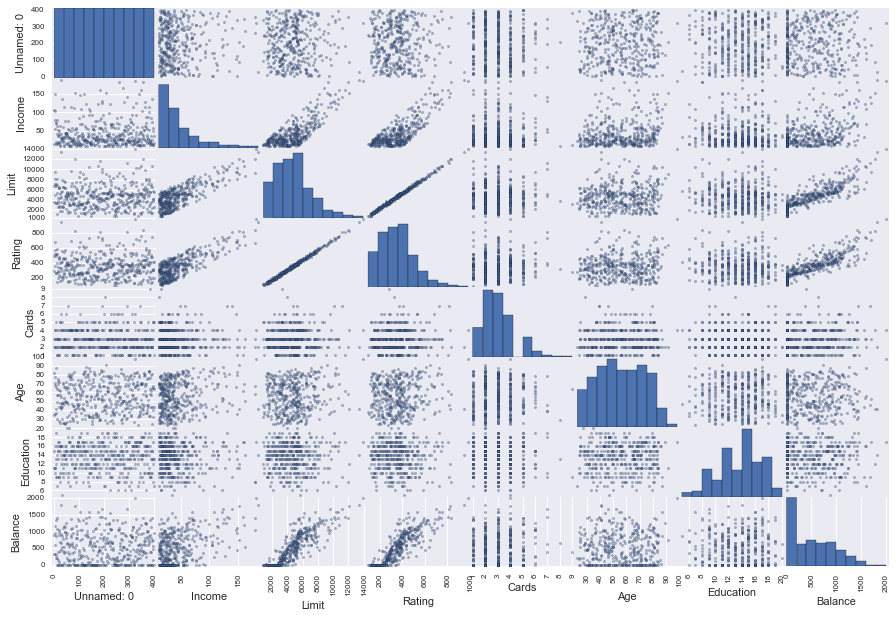

In [4]:
df_scatter_matrix = scatter_matrix(df, figsize = (15,10))

In [5]:
df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


After looking at the data, several features should be altered as they classify. Also, 'Ethnicity' is a dummy variable.

In [6]:
df['Gender'] = df['Gender'].map({' Male': 0, 'Female': 1})
df['Married'] = df['Married'].map({'Yes': 1, 'No':0})
df['Student'] = df['Student'].map({'Yes': 1, 'No': 0})

In [7]:
dummy = pd.get_dummies(df['Ethnicity']).rename(columns = lambda x : 'Ethnicity_'+str(x))
df = pd.concat([df,dummy], axis=1)

We then proceed to drop unnecessary columns.

In [9]:
df = df.drop('Ethnicity', axis=1)
df = df.drop('Unnamed: 0', axis=1)

In [10]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
0,14.891,3606,283,2,34,11,0,0,1,333,0.0,0.0,1.0
1,106.025,6645,483,3,82,15,1,1,1,903,0.0,1.0,0.0
2,104.593,7075,514,4,71,11,0,0,0,580,0.0,1.0,0.0
3,148.924,9504,681,3,36,11,1,0,0,964,0.0,1.0,0.0
4,55.882,4897,357,2,68,16,0,0,1,331,0.0,0.0,1.0


When you create a dummy variable, what you've really created is a multicollinear relationship between your indpendent variables. To solve this, we drop one of the columns. The column dropped can be thought of as the reference. Furthermore, the remaining columns represent the change from this reference.

In [11]:
df = df.drop('Ethnicity_African American', axis=1)

Unfortunately, the liner regression model from statsmodels does not support the automatic addition of the constant.

In [12]:
df = sm.add_constant(df)

In [13]:
X = df.ix[:, df.columns != 'Balance']
y = df['Balance']

In [15]:
model = sm.OLS(y,X)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Thu, 29 Dec 2016   Prob (F-statistic):          1.11e-253
Time:                        13:03:53   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const                -479.2079     35.774    -13.395      0.000      -549.543  -408.873
Income                 -7.8031      0.234    -33.314      0.000        -8.264    -7.343
Limit                   0.1909      0.033      5.824      0.000         0.126     0.255
Rating                  1.1365      0.491      2.315      0.021         0.171     2.102
Cards                  17.7245      4.341      4.083      0.000         9.190    26.259
Age                    -0.6139      0.294     -2.088      0.037        -1.192    -0.036
Education              -1.0989      1.598     -0.688      0.492        -4.241     2.043
Gender                -10.6532      9.914     -1.075      0.283       -30.145     8.839
Student               425.7474     16.723     25.459      0.000       392.869   458.626
Married                -8.5339     10.363     -0.824      0.411       -28.908    11.841
Ethnicity_Asian        16.8042     14.119      1.190      0.235       -10.955    44.564
Ethnicity_Caucasian    10.1070     12.210      0.828      0.408       -13.899    34.113
==============================================================================
Omnibus:                       34.899   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.766
Skew:                           0.782   Prob(JB):                     8.52e-10
Kurtosis:                       3.241   Cond. No.                     3.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Lets go ahead and drop the features that have a high p-value. Significant values are considered to have values less than .005, but lets start with the larger ones first.

In [16]:
df = df.drop(['Married', 'Ethnicity_Asian', 'Ethnicity_Caucasian', 'Gender', 'Education'], axis=1)

In [18]:
X = df.ix[:, df.columns != 'Balance']
y = df['Balance']

In [19]:
model_0 = sm.OLS(y,X)
model_0= model_0.fit()
model_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1380.
Date:                Thu, 29 Dec 2016   Prob (F-statistic):          1.58e-260
Time:                        13:12:24   Log-Likelihood:                -2400.5
No. Observations:                 400   AIC:                             4815.
Df Residuals:                     393   BIC:                             4843.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -493.7342     24.825    -19.889      0.000      -542.540  -444.928
Income        -7.7951      0.233    -33.395      0.000        -8.254    -7.336
Limit          0.1937      0.032      5.981      0.000         0.130     0.257
Rating         1.0912      0.485      2.251      0.025         0.138     2.044
Cards         18.2119      4.319      4.217      0.000         9.721    26.702
Age           -0.6241      0.292     -2.139      0.033        -1.198    -0.050
Student      425.6099     16.510     25.780      0.000       393.152   458.068
==============================================================================
Omnibus:                       34.091   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.623
Skew:                           0.772   Prob(JB):                     1.51e-09
Kurtosis:                       3.225   Cond. No.                     2.66e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As you can see, the R square value (adjusted) hasn't really changed. Let's explore more in depth. Lets look at the outliers.

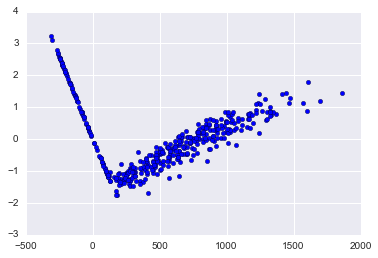

In [20]:
plt.scatter(model_0.fittedvalues, model_0.outlier_test()['student_resid'])
plt.show()

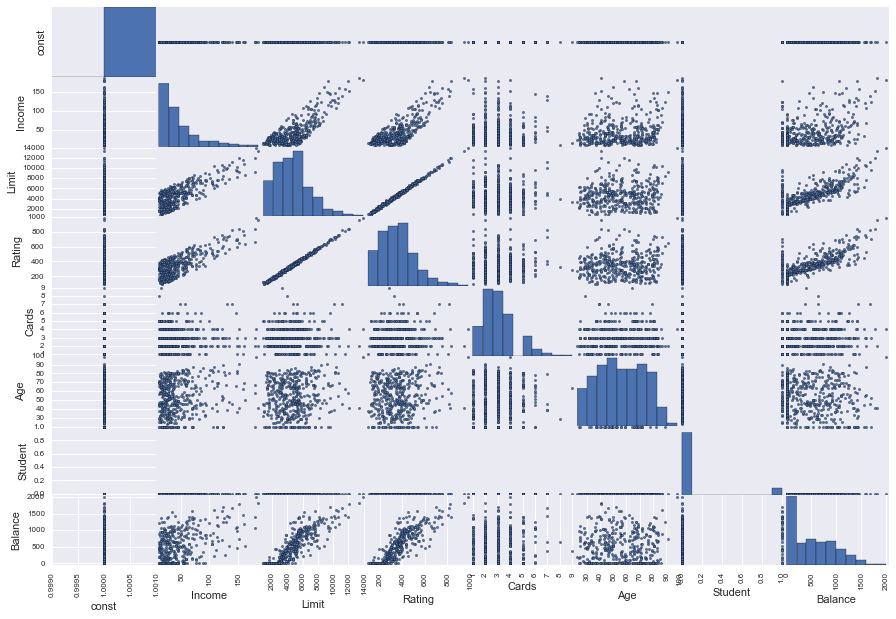

In [22]:
new_df_scatter_matrix = scatter_matrix(df, figsize (15,10))

If you look at 'Rating' and 'Limit' against our Y, 'Balance', there are a of zero values on the lower bottom left side that may be biasing our dataset.

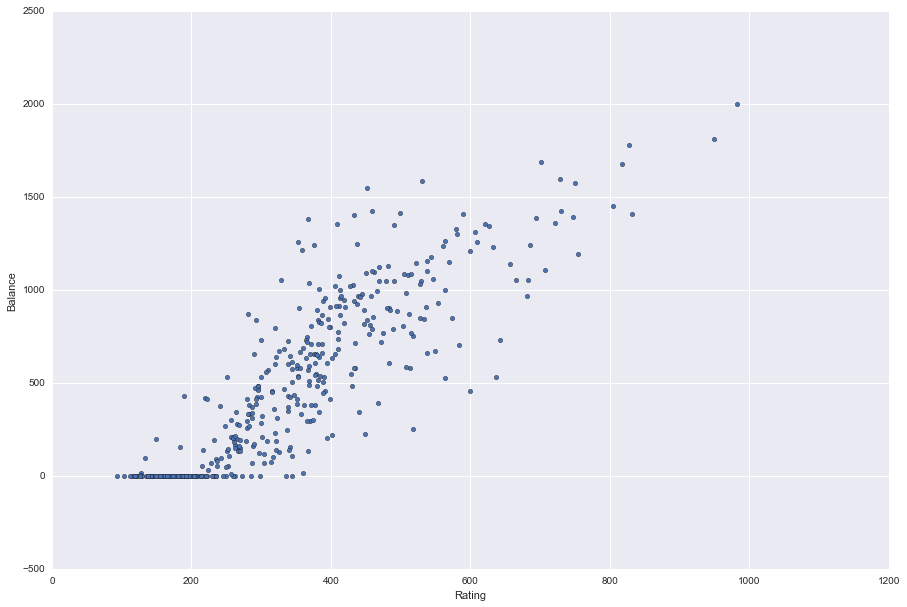

In [23]:
df.plot(kind='scatter', y='Balance', x='Rating', figsize=(15,10))

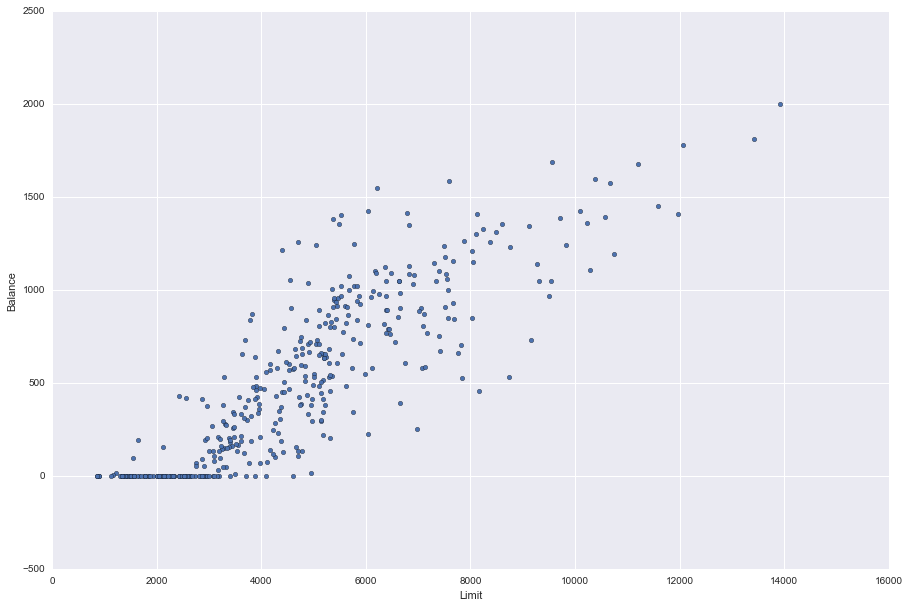

In [24]:
df.plot(kind='scatter', y='Balance', x='Limit', figsize=(15,10))

Let's go ahead and remove those and see how our model fits.

In [25]:
df = df.drop(df[df.Rating < 200].index)
df = df.drop(df[df.Limit < 2100].index)

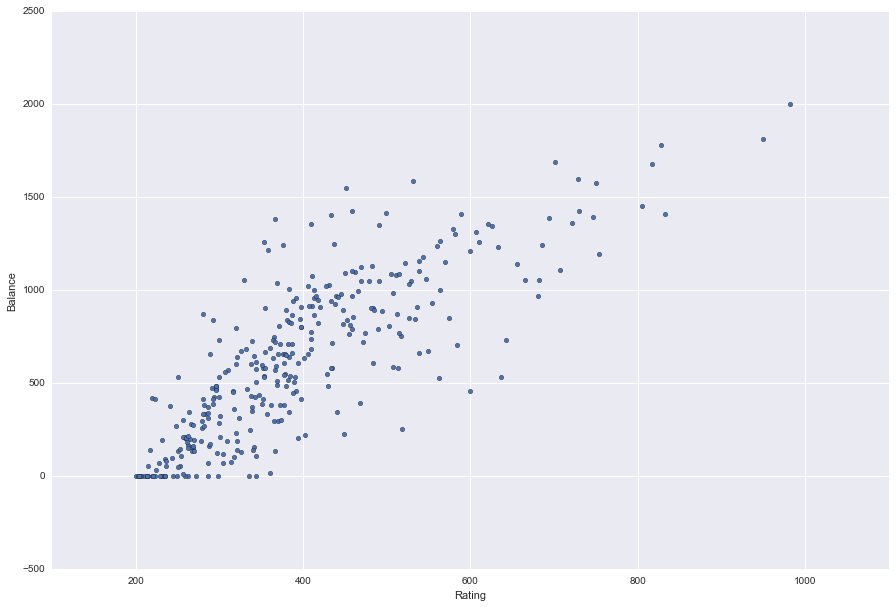

In [26]:
df.plot(kind='scatter', y='Balance', x='Rating', figsize=(15,10))

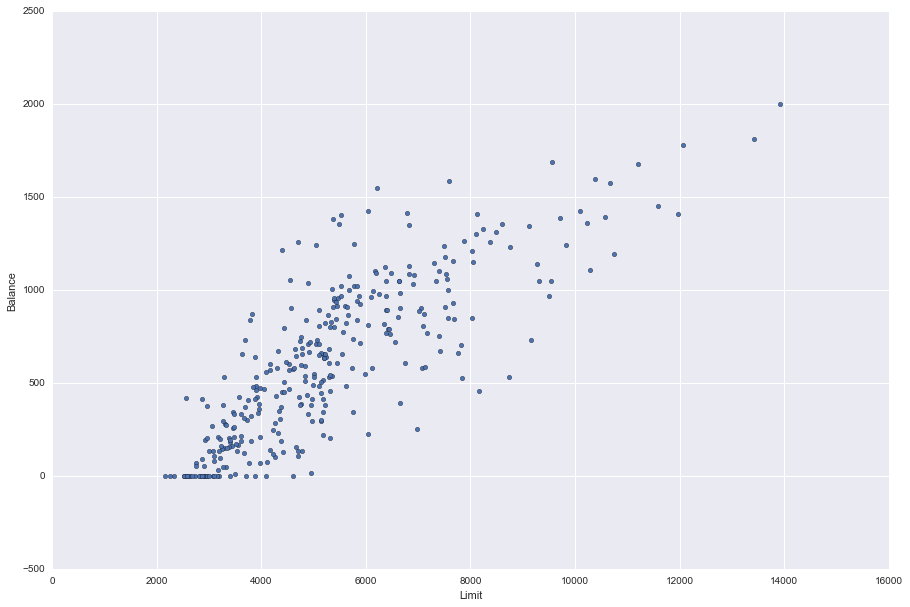

In [27]:
df.plot(kind='scatter', y='Balance', x='Limit', figsize=(15,10))

In [28]:
new_y = df['Balance']
new_X = df.ix[:, df.columns != 'Balance']

In [30]:
mode1_1 = sm.OLS(new_y, new_X)
model_1 = mode1_1.fit()
model_1.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     5649.
Date:                Thu, 29 Dec 2016   Prob (F-statistic):               0.00
Time:                        13:23:54   Log-Likelihood:                -1715.7
No. Observations:                 332   AIC:                             3445.
Df Residuals:                     325   BIC:                             3472.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -636.3420     12.549    -50.707      0.000      -661.030  -611.654
Income        -9.2245      0.110    -84.082      0.000        -9.440    -9.009
Limit          0.3028      0.015     19.634      0.000         0.272     0.333
Rating         0.0914      0.229      0.398      0.691        -0.360     0.542
Cards         24.6636      1.981     12.452      0.000        20.767    28.560
Age           -1.0143      0.140     -7.246      0.000        -1.290    -0.739
Student      486.3708      7.920     61.412      0.000       470.790   501.951
==============================================================================
Omnibus:                      288.651   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5472.933
Skew:                           3.636   Prob(JB):                         0.00
Kurtosis:                      21.514   Cond. No.                     3.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Looks like our model fits better now, what you do with the 'Rating' feature is your choice.